# Amazon Beauty Products Review-Sentiment Analysis

## Import Necessary Libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Decompress the Amazon Review Dataset 

The dataset is obtained from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Beauty_10.json.gz link and uploaded into Jupyter notebook via the following code. 

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:/users/eturk/Data_Science/Capstone_Project-Sentiment_Analysis/Dataset/reviews_Beauty_10.json.gz')

## Inspecting the Dataset

In [3]:
# Shape of the dataset
df.shape

(28798, 9)

In [4]:
# Read the file
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5.0,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5.0,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5.0,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4.0,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1.0,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [5]:
# Inspect the structure of the dataframe
df.sample(10).transpose()

,5852,27731,11654,26523,7304,18374,24471,3033,19999,23402
reviewerID,A3M174IC0VXOS2,A2OWR5G2OAQF7C,A1X3ESYZ79H59E,ATJV9TWMRNF8K,AAPPWNP9FWVWS,A2O6IC9KWY8TQR,A3R5GTYQ50QVMD,A1P2XYD265YE21,A89ZZKNDFQH23,AKJ3P4XK1KN5Y
asin,B004INUWX0,B00JR4FOLA,B008GSY7UM,B00ID8H4OG,B005TI7NQ2,B00ATY942M,B00GYB17TC,B0027CT5SC,B00CYA5E1O,B00GTBZXTC
reviewerName,Gail Cooke,Sincerely Yours,chaos,Cathe Fein Olson,"Kathlyn Storey ""Kathlyn A Storey""","SassySavi ""VioLetskieZ""",Robert 3086,"Andrea ""Readaholic""",Delaney,PhoenixFalls
helpful,"[24, 28]","[0, 1]","[0, 0]","[1, 1]","[0, 0]","[2, 3]","[1, 2]","[0, 0]","[1, 3]","[0, 0]"
reviewText,While this device takes some getting used to i...,Yikes. What didn't I like about it:It was try...,This mirror has an adjustable stand. You can a...,I like this curling iron. It has a good heat r...,In my teens I was diagnosed with acne rosacea ...,The cleanser has a very light citrus scent but...,My wife used this for several days and liked i...,This moisturizing lotion smells good. It smel...,"I was really hoping this would be awesome, cos...","I have very fine, long, straight hair, which I..."
overall,4,2,4,4,5,3,3,5,3,5
summary,a lot to be said for it,I really wanted to like this one,"nice, but a bit bulky",Easy to use,Best five minutes of my day,Fresh cleanser,Didn't notice any change,Smells Awesome,So disappointed,Lovely product!
unixReviewTime,1301011200,1402790400,1363737600,1404000000,1358035200,1365206400,1394150400,1256256000,1378857600,1392854400
reviewTime,"03 25, 2011","06 15, 2014","03 20, 2013","06 29, 2014","01 13, 2013","04 6, 2013","03 7, 2014","10 23, 2009","09 11, 2013","02 20, 2014"


In [6]:
# Inspect a sample 'reviewText'
df['reviewText'][2772]

'The Continuous Hydration in this night moisturizer certainly lives up to its name. Hours later, after a good night\'s sleep your skin will feel soft and smooth, if not a little bit slick. I found that the t-zone was a little greasy on me, so I have switched to using it only in specifically dry areas near the eyes and cheeks.It has a nice smooth feel to it and pleasant scent, but should be used for true dryness and might actually be too much for "average" skin. A little goes a long way, too.I would have preferred that it be packaged in a tube, since dipping in to the jar each evening is probably a bit more prone to leaving germs behind and causing it to degrade faster. Of course, that is a personal opinion, but I consider it something to think about.If you are looking for a super moisturizer and have very dry skin, this may be perfect for you. Those looking for a nice, light night cream might find it overwhelming.'

In [7]:
# Inspect a sample 'summary'
df['summary'][2772]

'Nighttime soother...'

In [8]:
# Basic information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28798 entries, 0 to 28797
Data columns (total 9 columns):
reviewerID        28798 non-null object
asin              28798 non-null object
reviewerName      28576 non-null object
helpful           28798 non-null object
reviewText        28798 non-null object
overall           28798 non-null float64
summary           28798 non-null object
unixReviewTime    28798 non-null int64
reviewTime        28798 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


**Each row corresponds to a customers' review information and related variables are explained below:**

reviewerID : ID of the reviewer

asin : ID of the product 

reviewerName : name of the reviewer 

helpful : helpfulness of the review, e.g. 2/3 

reviewText : text of the review 

overall : rating 

summary : summary of the review 

unixReviewTime : time of the review (unix time) 

reviewTime : time of the review (raw) 

In [9]:
# Basic Statistics of the Dataset
df.describe()

,overall,unixReviewTime
count,28798.000000,2.879800e+04
mean,4.168137,1.362445e+09
std,0.993920,4.214377e+07
min,1.000000,1.113350e+09
25%,4.000000,1.351123e+09
50%,4.000000,1.366070e+09
75%,5.000000,1.395274e+09
max,5.000000,1.406074e+09


In [10]:
# Checking weirdness on the dataset 
df['overall'][df['overall']<1].sum()

0.0

In [11]:
df['overall'][df['overall']>5].sum()

0.0

There is no rating out of defined 1-5 range. It makes sense. Let's see how many customers give ratings for each category. 

In [12]:
# Customer totals for each rating 
df['overall'].value_counts()

5.0    13766
4.0     8808
3.0     4110
2.0     1528
1.0      586
Name: overall, dtype: int64

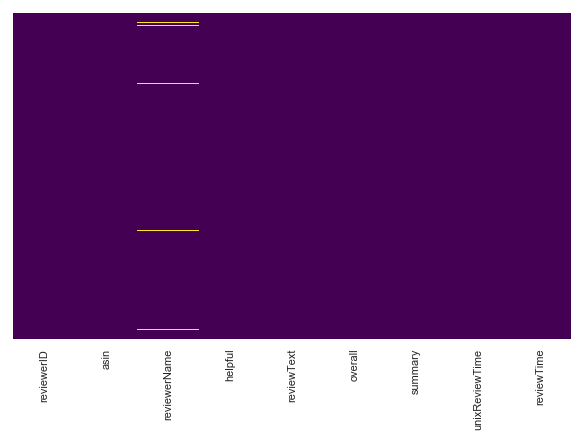

In [13]:
# Heatmap for missing values
plt.figure(figsize = (10,6))
sns.set()
_ = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
# Check for missing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      222
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

**Some information about dataset so far:**

This data includes 28798 rows(observations) and 9 columns(feature variables). 

Memory usage is 3.4+ MB. 

In the dataset, we have 7 object, 1 float64 and 1 int64 data types. 

222 'reviewerName' information is missing in the dataset. Since customer don't give their name, we should be suspicious about their reviews and ratings. I would prefer to drop the missing values from dataset  since we have enough observations to conclude a decision for sentiment analysis. 

We should concatenate 'reviewText' and 'summary' since both of them gives information about product, and also drop both 'reviewText' and 'summary' column at the end. 

'helpful' variable includes positive (thumbs up)  and negative (thumbs down) feedback for reviews' information, it will be splitted into two columns: positive feedback will be represented as "pos_feedback" , and negative feedback will be represented as "neg_feedback". Also, 'helpful' variable will be represented as an int64 type in the dataset via that step.

We should classify the 'overall' (ratings) as good, neutral and bad in order to make sentiment analysis. 

In the dataset, 'reviewerID' and 'reviwerName' are both for identification of customer. We should drop one of them from the dataset. Preferably, I will drop 'reviewerName' since customer names are not standardized and there are lots of different sytle to represent them.

'unixReviewTime' will be dropped since it has already been represented in 'reviewTime' feature in a more understandable format. Also, 'reviewTime' will be converted to datetime data type. 

We will rename the columns in order to improve practicality and the readibility of coding as stated below: 

- reviewerID : "customer"

- asin : "product"

- reviewerName : column will be dropped.

- helpful : positive feedback will be represented as "pos_feedback" , neutral feedback will be represented as "neut_feedback" and negative feedback will be represented as "neg_feedback".

- reviewText : This will be concatenated with "summary" and renamed as "review_text"

- overall : "rating" 

- summary : it will be dropped after it is concatenated with "reviewerText".

- unixReviewTime : column will be dropped. 

- reviewTime : "time"

Now, we will practice all defined action items above. 

## Dropping Missing Values

In [15]:
# Drop missing customers who don't give their names
df2 = df.dropna(axis=0)

In [16]:
# Customer totals for each rating (after drop missing values)
df2['overall'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: overall, dtype: int64

## Concatenating 'reviewText' and 'summary' columns

In [17]:
# Concatenate 'reviewText' and 'summary' as review_text and drop them 
df2['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df2 = df2.drop(['reviewText', 'summary'], axis = 1)
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...


## Spliting 'helpful' column into two separate columns

In [18]:
# Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end

list_positive = []
list_negative = []

for help in df2['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
df2['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df2['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
df2 = df2.drop('helpful', axis = 1)
df2.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0


## Classify the 'overall' (ratings) as good, neutral and bad

In [19]:
# Classify ratings as good
good_rate = len(df2[df2['overall'] > 3])
neut_rate = len(df2[df2['overall'] == 3])
bad_rate = len(df2[df2['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for beauty products'.format(good_rate))
print ('Neutral ratings : {} reviews for beauty products'.format(neut_rate))
print ('Bad ratings : {} reviews for beauty products'.format(bad_rate))

Good ratings : 22425 reviews for beauty products
Neutral ratings : 4067 reviews for beauty products
Bad ratings : 2084 reviews for beauty products


In [20]:
# Apply the new classification to the ratings column
df2['rating_class'] = df2['overall'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'neutral'))
df2.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


We have a new column named as 'rating_class' consists of three classes such as 'good, neutral and bad' after applying the new classification. 

## Dropping duplicate columns about customer ('reviwerName') and time ('unixReviewTime)

In [21]:
# Drop 'reviewName' and 'unixReviewTime'columns
df2 = df2.drop(['reviewerName', 'unixReviewTime'], axis = 1)
df2.head()

,reviewerID,asin,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,5.0,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,5.0,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,4.0,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,1.0,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


## Arranging Time column

In [22]:
# Convert time object to datetime and create a new column named 'time'
df2['time'] = df2.reviewTime.str.replace(',', "")
df2['time'] = pd.to_datetime(df2['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
df2 = df2.drop('reviewTime', axis = 1)
df2.head()

,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21


In [23]:
# Check the 'time' data type with a sample observation
type(df2.time[110])

pandas._libs.tslibs.timestamps.Timestamp

## Rename column names

In [24]:
# Rename the columns
df2.columns = ['customer', 'product', 'rating', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class', 'time']

# Sample observation
df2.sample()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time
9270,A1W4F91DH3XPB2,B0072XR560,2.0,"Too greasy, too heavy on the hair Of course, I...",0,0,bad,2013-02-12


## Descriptive Statistics 

In [25]:
# Read statistic summary of numeric variables
df2.describe()

,rating,pos_feedback,neg_feedback
count,28576.000000,28576.000000,28576.000000
mean,4.170493,0.948488,0.324888
std,0.992277,6.829651,1.105870
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,549.000000,52.000000


In [26]:
# Customer totals for each rating 
df2['rating'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: rating, dtype: int64

In [27]:
# Customer totals for each rating class
df2['rating_class'].value_counts()

good       22425
neutral     4067
bad         2084
Name: rating_class, dtype: int64

In [28]:
# Print the number of positive feedback
pos = len(df2[df2['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

# Print the number of negative feedback
neg = len(df2[df2['neg_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))

# Print the number of no 'helpful' feedback 
total = len(df2)
print('\nNumber of no helpful feedbacks: {}'.format(total - (pos + neg)))

Number of positive feedbacks: 8397

Number of negative feedbacks: 6078

Number of no helpful feedbacks: 14101


In [29]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df2['customer'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(df2['product'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(df2)/len(df2['customer'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(df2)/len(df2['product'].unique()))))     


Number of unique customers : 1340

Number of unique products : 733

Review per customer: 21.32537313432836

Review per product: 38.9849931787176


**Descriptive Statistic Summary:**

**- Rating Status:**

28576 customer gives ratings and mean of the ratings is 4.17, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good', 'neutral', and 'bad' above. 

According to the statistics on rating stars:

576 customers give 1 star 

1508 customers give 2 stars

4067 customers give 3 stars

8742  customers give 4 stars

13683 customers give 5 stars


On the other hand, if we look for the rating class, the picture is look like below.

2084 customers give bad ratings

4067 customers give neutral ratings

22425 customers give good ratings

**- Feedback Status**

8397 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The mean 0.9 and standard deviation is 6.8 whereas the highest positive feedback number for reviews is 549. That shows we may have some outliers in the dataset. 

6078 customers find the given reviews useless and don't aggree with the them. They give negative feedbacks. The mean 0.3 and standard deviation is 1.1 whereas the highest negative feedback number for reviews is 52.

On the other hand 14101 customers don't give either positive or negative feedbacks for reviews. 

**- Non-numeric variables statistics:**

We have 1340 unique customers and 733 products in this dataset. Each customers averagely give 21 reviews for products and on the other hand, there is averagely 40 reviews for each product in the website. 

On exploratory data analysis, we will check if there is a case for outliers by visualizing data. 

## Preprocessing the new_text

In [55]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

**Removing HTML tags**

We will write a function to remove the HTML tags which typically does not add much value towards understanding and analyzing text. 

In [31]:
def strip_html_tags(text):
    
    "Removes html tags in the text"
    
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

**Removing accented characters**

We will write a function to convert and standardize accented characters/letters into ASCII characters.

In [32]:
def remove_accented_chars(text):
    
    "Removes and standardize accented characters/letters"
    
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

**Expanding Contractions**

We will write a function to convert each contraction to its expanded, orginal form in order to help with text standardization. 

In [33]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    "Convert contractions into their original forms"
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

**Removing Special Characters**

We will use simple regular expressions(regexes) to remove special characters and symbols which are usually non-alphanumeric characters or even occasional numeric characters.

In [34]:
def remove_special_characters(text, remove_digits=False):
    
    "Remove special characters/symbols"
    
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

**Lemmatization**

We will remove word affixes to get to the base form of a word, known as root word. 

In [35]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! the car crashed yesterday, ours crashes daily")

'My system keep crash ! the car crash yesterday , ours crash daily'

**Removing stopwords**

We will write a function to remove stopwords which have little or no significance in the text. 

In [36]:
# Instantiate Tokenizer
tokenizer = ToktokTokenizer()

# Create stopword list
stopword_list = nltk.corpus.stopwords.words('english')

# 'no' and 'not' may give us information so those are removed from stop list
stopword_list.remove('no')
stopword_list.remove('not')

In [37]:
def remove_stopwords(text, is_lower_case=False):
    
    "Remove stopwords in the text except 'no' and 'not'"
    
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

**Building a Text Normalizer**

Based on the functions which we have written above and also with additional text correction techniques, we will build a text normalizer in order to help us to preproces the new_text document. 

In [40]:
def normalize_corpus(doc, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
     
    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)
            
    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)
            
    # expand contractions    
    if contraction_expansion:
        doc = expand_contractions(doc)
            
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
            
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
            
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
            
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
        
    # remove ' (apostrophe) sign
    doc = re.sub(r"'", r'', doc)
        
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
    return doc

**Applying text normalizer to "review_text"**

In [47]:
# Create a new column for cleaned text 
df2['clean_text'] = df2['review_text'].map(lambda doc: normalize_corpus(doc))

**Applying tokenizer to create tokens for the clean text**

In [57]:
# Apply tokenizer to create a new column named as tokens which consists of the list of the reviews
tokenizer = RegexpTokenizer(r'\w+')
df2["tokens"] = df2["clean_text"].apply(tokenizer.tokenize)
df2.head()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"[choose, one, product, take, care, face, rest,..."
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"[make, skin, lovely, smooth, woman, near, need..."
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"[work, well, reasonable, price, use, regenerat..."
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13,work lady try many product totally disappointe...,"[work, lady, try, many, product, totally, disa..."
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21,not like feel texture serum love oil olay prim...,"[not, like, feel, texture, serum, love, oil, o..."


In [63]:
# Tokens status
all_words = [word for tokens in df2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df2["tokens"]]
vocabulary = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabulary)))
print("Max review length is (word based) %s" % max(sentence_lengths))
print("Max review length is (word based) %s" % min(sentence_lengths))

2023994 words total, with a vocabulary size of 27310
Max review length is (word based) 1090
Max review length is (word based) 1


## Write dataframe to CSV file

In [64]:
df2.to_csv('cleaned_review_beauty.csv', sep = ',', encoding = 'utf-8', index = False)